In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
df = pd.read_csv("housePrice.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [55]:
# حذف ردیف‌هایی که حداقل در یک ستون مقدار خالی دارند
df = df.dropna()

# نمایش مقادیر غیر عددی
non_numeric_areas = df[~df['Area'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_areas)

                  Area  Room  Parking  Warehouse  Elevator            Address  \
570     3,310,000,000      2     True       True      True        Ostad Moein   
709    16,160,000,000      3     True       True      True           Pasdaran   
807             1,000      2     True       True     False           Damavand   
1604    8,400,000,000      2     True       True      True         Gheitarieh   
2171            3,600      2    False      False     False           Shahryar   
2802    2,550,000,000      2     True       True      True  Central Janatabad   

             Price  Price(USD)  
570   3.310000e+09   110333.33  
709   1.616000e+10   538666.67  
807   7.000000e+09   233333.33  
1604  8.700000e+09   290000.00  
2171  9.720000e+09   324000.00  
2802  2.550000e+09    85000.00  


In [57]:
#متوجه شدم عددهای بزرگ رو غیر عددی تشخیص میده بنابراین از این روش استفاده کردم برای حذف متراژهای بزرگ
df = df[df['Area'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# تبدیل مقادیر ستون 'Area' به نوع عددی
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# حذف ردیف‌هایی که مقدار 'Area' آنها عددی نیست (یعنی تبدیل به NaN شده‌اند)
df = df.dropna(subset=['Area'])

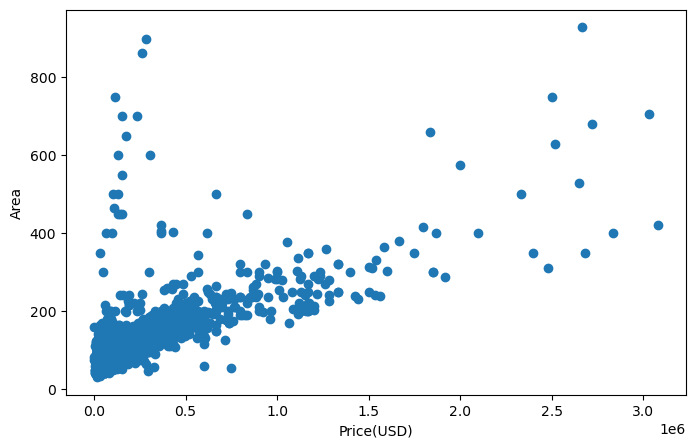

In [59]:
x_data, y_data = (df['Area'].values, df["Price(USD)"].values)
plt.figure(figsize=(8,5))
plt.scatter(y_data, x_data)
plt.xlabel("Price(USD)")
plt.ylabel("Area")
plt.show()

In [79]:
cdf = df[['Area','Room', "Price(USD)"]]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [75]:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room']])
y = np.asanyarray(train[["Price(USD)"]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2545.68670147 48814.76467951]]


In [77]:
y_hat= regr.predict(test[['Area','Room']])
x = np.asanyarray(test[['Area','Room']])
y = np.asanyarray(test[["Price(USD)"]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 29619690494.59
Variance score: 0.49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
